In [ ]:
Start_Date="2021-01-04"
Maturity="2022-01-21"

In [ ]:
data=pd.read_excel("options.xlsx")
stock_SPX=pdr.get_data_yahoo('^GSPC', Start_Date, "2021-10-07")

In [ ]:
x=list(data['Dates'])

In [ ]:
stock_SPX['Adj Close'].pct_change().std()

In [ ]:
d=list(stock_SPX.index)
for i in x:
    if i not in d:
        print(i)

In [ ]:
spx_price=list(stock_SPX['Adj Close'])
data['SPX']=spx_price

In [ ]:
Start_Date="2021-01-04"
Maturity="2022-01-21"

In [ ]:
import scipy.stats as si

In [ ]:
import math as m

In [ ]:
import numpy as np
import datetime as dt


start = dt.date( 2021, 1, 4 )
end = dt.date( 2022, 1, 21 )

T = np.busday_count( start, end )

In [ ]:
data.head()

In [ ]:
options_list=list(data.columns)
options_list.remove('SPX')
options_list.remove('Dates')

In [ ]:
weights=pd.DataFrame()
weights['Dates']=data['Dates']
for col in options_list:
    strike=col.split(" ")[0]
    X=int(strike[1:])
    weights[col]=1/pow(X,2)
# for i in range(len(weights)):
#     for j in weights.columns:
weights

In [ ]:
implied_vol=pd.DataFrame()
implied_vol_call=pd.DataFrame()
implied_vol_put=pd.DataFrame()
cols=data.columns
for j in range(1,9):
    strike=cols[j].split(" ")[0]
    X=int(strike[1:])
    temp=[]
    for i in range(len(data)):
        temp.append(newton_vol_call(data['SPX'][i], X, T, data[cols[j]][i], 0.05, 0.25))
    implied_vol[strike]=temp
    implied_vol_call[strike]=temp
temp=[]
for i in range(len(data)):
    temp.append(newton_vol_call(data['SPX'][i], data['SPX'][i], T, data[cols[j]][i], 0.05, 0.25))
implied_vol['SPX']=temp
implied_vol_call['SPX']=temp
implied_vol_put['SPX']=temp

In [ ]:
for j in range(10,len(cols)-1):
    strike=cols[j].split(" ")[0]
    X=int(strike[1:])
    temp=[]
    for i in range(len(data)):
        temp.append(newton_vol_put(data['SPX'][i], X, T, data[cols[j]][i], 0.05, 0.25))
    implied_vol[strike]=temp
    implied_vol_put[strike]=temp
    

In [ ]:
implied_vol_call['Date']=x
implied_vol_put['Date']=x
implied_vol_put.set_index('Date')
implied_vol_call.set_index('Date')

In [ ]:
s_prices=[]
for i in range(3000,5000,100):
    s_prices.append(i)

In [ ]:
big={}
for i in x:
    big[i]=s_prices

In [ ]:
var_vega={}

In [ ]:
implied_vol_call.iloc[-10]

In [ ]:
temp_cols=list(implied_vol_call.columns)
#implied_vol_call.iloc[-10]
temp_cols=temp_cols[:len(temp_cols)-2]
smile={}
for i in range(len(temp_cols)):
    smile[int(temp_cols[i][1:])]=implied_vol_call.iloc[-4][i]
#     print(str(temp_cols[i]) + "  " + str(implied_vol_call.iloc[-10][i]) )

In [ ]:
plt.plot(smile.keys(),smile.values())

In [ ]:
for j in range(len(cols)-1):
    if "C" in cols[j] and cols[j]!="Dates":
        print(cols[j])

In [ ]:
#var_vega=[[0 for j in range(len(x)) for i in range(s_prices)]
var_vega={}
for i in range(len(data)):
    #print(i)
    a={}
    for s in s_prices:
        temp=0
        for j in range(1,len(cols)-1):
            strike=cols[j].split(" ")[0]
            X=int(strike[1:])
            #print(cols[j])
            if "C" in cols[j] and cols[j]!="Dates":
                temp+=(1*variance_vega(s,X,i, 0.05, implied_vol[strike][i]) * weights[cols[j]][i])
        a[s]=temp
    var_vega[x[i]]=a

In [ ]:
dt=x[130]
var_vega[dt]
a=list(var_vega[dt].keys())
b=list(var_vega[dt].values())
len(a),len(b)
plt.plot(a,b)

In [ ]:
# var_vega={}
# for i in range(10):
#     qwerty=pd.DataFrame()
#     for j in range(10,len(cols)-1):
#         strike=cols[j].split(" ")[0]
#         X=int(strike[1:])
#         temp=[]
#         for s in big[x[i]]:
#             temp.append( variance_vega(s,X,i, 0.05, implied_vol[strike][i]) * weights[cols[j]][i] )
            
#         qwerty[cols[j]]=temp
#     var_vega[i]=qwerty 

In [ ]:

# variance_vega={}
# for j in range(10,len(cols)):
#     strike=cols[j].split(" ")[0]
#     if j!=len(cols)-1:
#         X=int(strike[1:])
#         temp=pd.DataFrame()
#         for i in range(len(data)):
#             dt=data['Dates'][i]
#             for s in range(len(big[dt])):
#                 temp.append(variance_vega(big[dt][s], X, s, data[cols[j]][i], 0.05, implied_vol_call[cols[j]][i]))
#         variance_vega[strike]=temp

NameError: name 'implied_vol_call' is not defined

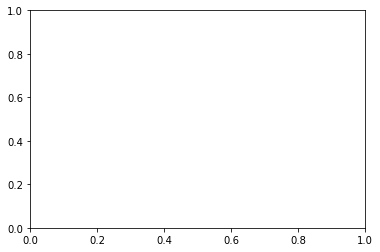

In [125]:
ax = plt.gca()
implied_vol_call.plot(kind='line',x='Date',y='C4800',color="yellow",ax=ax)
implied_vol_call.plot(kind='line',x='Date',y='C4700', color='red', ax=ax)
implied_vol_call.plot(kind='line',x='Date',y='C4650',color="green",ax=ax)
implied_vol_call.plot(kind='line',x='Date',y='C4500', color='blue', ax=ax)
implied_vol_call.plot(kind='line',x='Date',y='C4450',color="black",ax=ax)
implied_vol_call.plot(kind='line',x='Date',y='C4400', color='brown', ax=ax)
implied_vol_call.plot(kind='line',x='Date',y='C4250',color="pink",ax=ax)
implied_vol_call.plot(kind='line',x='Date',y='C4150', color='purple', ax=ax)
implied_vol_call.plot(kind='line',x='Date',y='SPX', color='grey', ax=ax)


ax = plt.gca()
implied_vol_put.plot(kind='line',x='Date',y='P4300',color="yellow",ax=ax)
implied_vol_put.plot(kind='line',x='Date',y='P4200', color='red', ax=ax)
implied_vol_put.plot(kind='line',x='Date',y='P4100',color="green",ax=ax)
implied_vol_put.plot(kind='line',x='Date',y='P4000', color='blue', ax=ax)
implied_vol_put.plot(kind='line',x='Date',y='P3800',color="black",ax=ax)
implied_vol_put.plot(kind='line',x='Date',y='P3750', color='brown', ax=ax)
implied_vol_put.plot(kind='line',x='Date',y='P3500',color="pink",ax=ax)
implied_vol_put.plot(kind='line',x='Date',y='P3325', color='purple', ax=ax)
implied_vol_put.plot(kind='line',x='Date',y='SPX', color='grey', ax=ax)

In [ ]:
a=[[1,2,3],[1,5,6],[1,5,7],[10,11,14]]

In [ ]:
t=sorted(a,key=lambda x :(x[0],x[1],x[2]))

In [ ]:
t

In [ ]:
s = sorted(s, key = lambda x: (x[1], x[2]))